In [1]:
import pandas as pd
import seaborn as sns
import re

In [2]:
df_whole = pd.read_csv('../data/processed/02_cleaned_data.csv', index_col=0)

In [3]:
df_whole.shape

(978, 836)

In [4]:
df_whole.head()

,AP1. Wie alt sind Sie?,AP1. Wie alt sind Sie?_0.0,AP1. Wie alt sind Sie?_1.0,AP1. Wie alt sind Sie?_10.0,AP1. Wie alt sind Sie?_2.0,AP1. Wie alt sind Sie?_3.0,AP1. Wie alt sind Sie?_4.0,AP1. Wie alt sind Sie?_5.0,AP1. Wie alt sind Sie?_6.0,AP1. Wie alt sind Sie?_7.0,...,W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],W9. Bekommen Sie Ihre Vergütung pünktlich zum vertraglich vereinbarten Zeitpunkt?_1,W9. Bekommen Sie Ihre Vergütung pünktlich zum vertraglich vereinbarten Zeitpunkt?_Teils,id. Antwort ID
0,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,953
1,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,24
2,4.0,False,False,False,False,False,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,57
3,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,65
4,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,93


# Correlation Analysis

In [5]:
# Calculate the correlation matrix
corr_matrix = df_whole.corr(method='pearson')

# Gather unique pairs of correlations
correlations = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  # Start from i+1 to avoid duplicates and self-correlations
        correlations.append([corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]])

# Create a DataFrame to hold the correlations
corr_df = pd.DataFrame(correlations, columns=['Column1', 'Column2', 'CorrelationCoefficient'])

print(corr_df)

                                                  Column1  \
0                                  AP1. Wie alt sind Sie?   
1                                  AP1. Wie alt sind Sie?   
2                                  AP1. Wie alt sind Sie?   
3                                  AP1. Wie alt sind Sie?   
4                                  AP1. Wie alt sind Sie?   
...                                                   ...   
349025  W8[SQ004]. Wie werden zusätzlich geleistete Ar...   
349026  W8[SQ004]. Wie werden zusätzlich geleistete Ar...   
349027  W9. Bekommen Sie Ihre Vergütung pünktlich zum ...   
349028  W9. Bekommen Sie Ihre Vergütung pünktlich zum ...   
349029  W9. Bekommen Sie Ihre Vergütung pünktlich zum ...   

                                                  Column2  \
0                              AP1. Wie alt sind Sie?_0.0   
1                              AP1. Wie alt sind Sie?_1.0   
2                             AP1. Wie alt sind Sie?_10.0   
3                      

In [6]:
print(corr_df.head())
len(corr_df)

                  Column1                      Column2  CorrelationCoefficient
0  AP1. Wie alt sind Sie?   AP1. Wie alt sind Sie?_0.0               -0.170826
1  AP1. Wie alt sind Sie?   AP1. Wie alt sind Sie?_1.0               -0.438806
2  AP1. Wie alt sind Sie?  AP1. Wie alt sind Sie?_10.0                0.237765
3  AP1. Wie alt sind Sie?   AP1. Wie alt sind Sie?_2.0               -0.456051
4  AP1. Wie alt sind Sie?   AP1. Wie alt sind Sie?_3.0               -0.121771


349030

In [7]:
corr_df_sorted = corr_df.sort_values(by='CorrelationCoefficient')

In [8]:
significant_corr_df =  corr_df[(corr_df['CorrelationCoefficient']>0.7) | (corr_df['CorrelationCoefficient']<-0.7)]
len(significant_corr_df)

549

In [9]:
significant_corr_df.to_csv('../data/processed/03_significant_correlations.csv')
corr_df.to_csv('../data/processed/03_all_correlations.csv')

# visualizations

In [10]:
significant_corr_df.iloc[0][1]

/tmp/ipykernel_19565/2159218889.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  significant_corr_df.iloc[0][1]


'AP5r[SQ002]. Bitte machen Sie folgende Angaben:\xa0 [In wie vielen Berufsjahren insgesamt (Jahre in Ziffern)? ]'

/tmp/ipykernel_19565/1352033493.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x=significant_corr_df.iloc[0][0],
/tmp/ipykernel_19565/1352033493.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=significant_corr_df.iloc[0][1],


<Axes: xlabel='AP1. Wie alt sind Sie?', ylabel='AP5r[SQ002]. Bitte machen Sie folgende Angaben:\xa0 [In wie vielen Berufsjahren insgesamt (Jahre in Ziffern)? ]'>

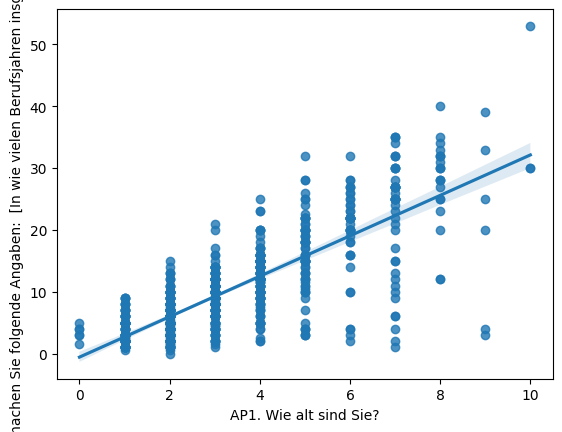

In [11]:
sns.regplot(data=df_whole, 
            x=significant_corr_df.iloc[0][0], 
            y=significant_corr_df.iloc[0][1],
            ci=95)

### fixed term vs permanent contracts

In [12]:
#extract columns with education levels
ls_cols_education_level = [col for col in df_whole if col.startswith('AP2[')]
ls_cols_contract = [col for col in df_whole if col.startswith('M9.')]

#extract education levels
# Regular expression to find a string inside square brackets at the end of column
pattern = re.compile(r'\[([^\]]*)\]$')
strings_inside_brackets = [pattern.search(col).group(1) if pattern.search(col) else None for col in ls_cols_education_level]
print(strings_inside_brackets)

['Bachelor of Arts: ', 'Master of Arts:', 'Magister Artium:', 'I. Staatsexamen:', 'II. Staatsexamen:', 'Diplom:', 'Dr. phil.:', 'Dr. phil. habil. bzw. PD:', 'Sonstiges:', 'Ausländischer akademischer Grad:']


In [13]:
#extract Museumsmitarbeiter and extract the important columns
df_museum = df_whole[df_whole['AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.\xa0  Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen:\xa0_Museums- oder Ausstellungswesen und Denkmalpflege']==True]
df_museum_contract_education = df_museum[ls_cols_education_level + ls_cols_contract]

In [14]:
#create filter for those entries that answered True or False in both questions M9 (fixed term or permanent contract)
df_museum_contract_education['M9_XOR'] = (df_museum_contract_education['M9. Sind Sie momentan befristet beschäftigt?\xa0_1'] | df_museum_contract_education['M9. Sind Sie momentan befristet beschäftigt?\xa0_Nein, ich habe eine entfristete Stelle.']) & ~(df_museum_contract_education['M9. Sind Sie momentan befristet beschäftigt?\xa0_1'] & df_museum_contract_education['M9. Sind Sie momentan befristet beschäftigt?\xa0_Nein, ich habe eine entfristete Stelle.'])
df_museum_contract_education.head()

/tmp/ipykernel_19565/497052900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_museum_contract_education['M9_XOR'] = (df_museum_contract_education['M9. Sind Sie momentan befristet beschäftigt?\xa0_1'] | df_museum_contract_education['M9. Sind Sie momentan befristet beschäftigt?\xa0_Nein, ich habe eine entfristete Stelle.']) & ~(df_museum_contract_education['M9. Sind Sie momentan befristet beschäftigt?\xa0_1'] & df_museum_contract_education['M9. Sind Sie momentan befristet beschäftigt?\xa0_Nein, ich habe eine entfristete Stelle.'])


,AP2[SQ001]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Bachelor of Arts: ],AP2[SQ002]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Master of Arts:],AP2[SQ003]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Magister Artium:],AP2[SQ004]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [I. Staatsexamen:],AP2[SQ005]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [II. Staatsexamen:],AP2[SQ006]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Diplom:],AP2[SQ007]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Dr. phil.:],AP2[SQ008]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Dr. phil. habil. bzw. PD:],AP2[SQ009]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Sonstiges:],AP2[SQ010]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Ausländischer akademischer Grad:],M9. Sind Sie momentan befristet beschäftigt? _1,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.",M9_XOR
0,0,1,0,0,0,0,0,0,0,0,True,False,True
1,0,1,0,0,0,0,0,0,0,0,True,False,True
3,0,1,0,0,0,0,0,0,0,0,True,False,True
5,0,0,0,0,0,0,1,0,0,0,False,False,False
15,0,1,0,0,0,0,0,0,0,0,True,False,True


In [15]:
#filter out entries
df_museum_contract_education_filtered = df_museum_contract_education[df_museum_contract_education['M9_XOR']==True]
df_museum_contract_education_filtered.shape

(397, 13)

In [16]:
df_museum_contract_education_filtered

,AP2[SQ001]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Bachelor of Arts: ],AP2[SQ002]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Master of Arts:],AP2[SQ003]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Magister Artium:],AP2[SQ004]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [I. Staatsexamen:],AP2[SQ005]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [II. Staatsexamen:],AP2[SQ006]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Diplom:],AP2[SQ007]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Dr. phil.:],AP2[SQ008]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Dr. phil. habil. bzw. PD:],AP2[SQ009]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Sonstiges:],AP2[SQ010]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Ausländischer akademischer Grad:],M9. Sind Sie momentan befristet beschäftigt? _1,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.",M9_XOR
0,0,1,0,0,0,0,0,0,0,0,True,False,True
1,0,1,0,0,0,0,0,0,0,0,True,False,True
3,0,1,0,0,0,0,0,0,0,0,True,False,True
15,0,1,0,0,0,0,0,0,0,0,True,False,True
16,0,0,0,0,0,0,1,0,0,0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,0,0,1,0,0,0,0,0,0,0,True,False,True
1002,1,1,0,0,0,0,0,0,0,0,False,True,True
1004,0,0,1,0,0,0,1,0,0,0,False,True,True
1009,0,0,0,0,0,0,1,0,0,0,True,False,True


#### create a new dataframe with aggregated data

In [17]:
# List to hold the data for the new DataFrame
data_for_new_df = []

# Education levels
education_levels = ls_cols_education_level

# Calculate sums for each education level
for level in education_levels:
    fixed_term_sum = df_museum_contract_education_filtered[(df_museum_contract_education_filtered[level]) & (df_museum_contract_education_filtered['M9. Sind Sie momentan befristet beschäftigt?\xa0_1'])].shape[0]
    permanent_sum = df_museum_contract_education_filtered[(df_museum_contract_education_filtered[level]) & (df_museum_contract_education_filtered['M9. Sind Sie momentan befristet beschäftigt?\xa0_Nein, ich habe eine entfristete Stelle.'])].shape[0]
    
    data_for_new_df.append({
        'EducationLevel': level,
        'FixedTermSum': fixed_term_sum,
        'PermanentSum': permanent_sum
    })

# Convert the list of dictionaries to a DataFrame
df_edu_level_vs_contracts = pd.DataFrame(data_for_new_df)
df_edu_level_vs_contracts['EducationLevel'] = strings_inside_brackets

df_edu_level_vs_contracts

,EducationLevel,FixedTermSum,PermanentSum
0,Bachelor of Arts:,41,12
1,Master of Arts:,129,46
2,Magister Artium:,40,58
3,I. Staatsexamen:,1,1
4,II. Staatsexamen:,0,1
5,Diplom:,3,2
6,Dr. phil.:,49,70
7,Dr. phil. habil. bzw. PD:,2,1
8,Sonstiges:,4,4
9,Ausländischer akademischer Grad:,1,3


##### add new columns

In [18]:
df_edu_level_vs_contracts['totals'] = df_edu_level_vs_contracts['FixedTermSum'] + df_edu_level_vs_contracts['PermanentSum']
df_edu_level_vs_contracts['FixedTermPerc'] = (df_edu_level_vs_contracts['FixedTermSum'] / (df_edu_level_vs_contracts['FixedTermSum'] + df_edu_level_vs_contracts['PermanentSum']))*100 
df_edu_level_vs_contracts['PermanentPerc'] = (df_edu_level_vs_contracts['PermanentSum'] / (df_edu_level_vs_contracts['FixedTermSum'] + df_edu_level_vs_contracts['PermanentSum']))*100 
df_edu_level_vs_contracts

,EducationLevel,FixedTermSum,PermanentSum,totals,FixedTermPerc,PermanentPerc
0,Bachelor of Arts:,41,12,53,77.358491,22.641509
1,Master of Arts:,129,46,175,73.714286,26.285714
2,Magister Artium:,40,58,98,40.816327,59.183673
3,I. Staatsexamen:,1,1,2,50.000000,50.000000
4,II. Staatsexamen:,0,1,1,0.000000,100.000000
5,Diplom:,3,2,5,60.000000,40.000000
6,Dr. phil.:,49,70,119,41.176471,58.823529
7,Dr. phil. habil. bzw. PD:,2,1,3,66.666667,33.333333
8,Sonstiges:,4,4,8,50.000000,50.000000
9,Ausländischer akademischer Grad:,1,3,4,25.000000,75.000000


Text(1.02, 0.985, 'Gesamtzahl')

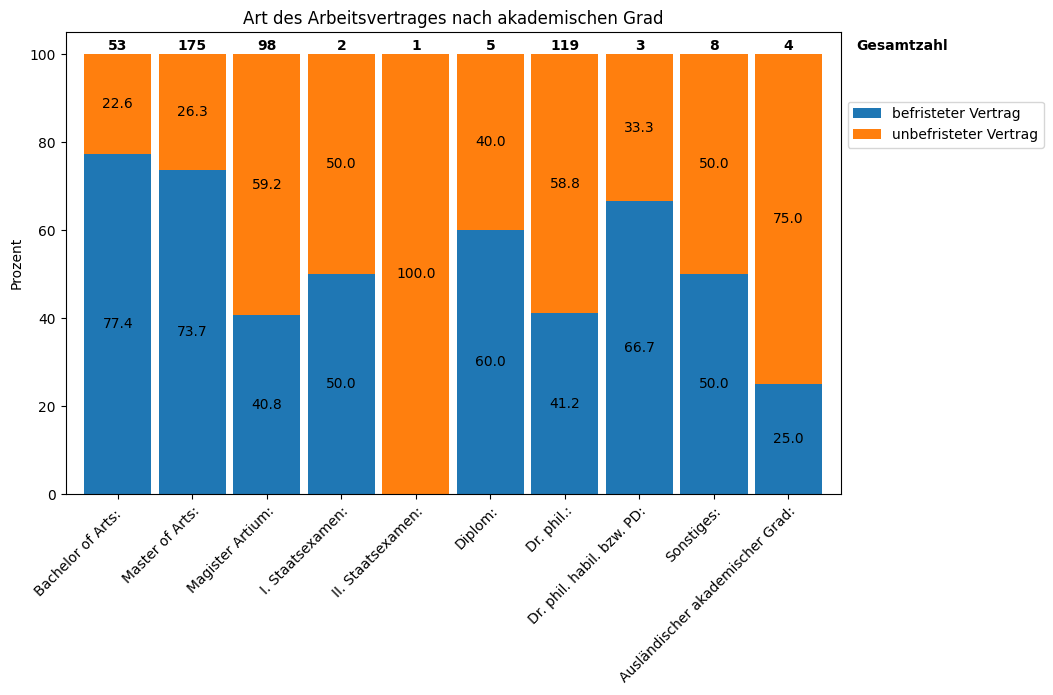

In [41]:
ax = df_edu_level_vs_contracts[['EducationLevel', 'FixedTermPerc', 'PermanentPerc']].set_index('EducationLevel').plot(kind='bar', 
                                                                                          stacked=True, 
                                                                                          figsize=(10, 6),                                                                                        
                                                                                          rot=45,
                                                                                          ylabel='Prozent',
                                                                                          width=0.9,
                                                                                          title='Art des Arbeitsvertrages nach akademischen Grad'
                                                                                          )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(df_edu_level_vs_contracts['EducationLevel'], rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['befristeter Vertrag', 'unbefristeter Vertrag'])
ax.set_xlabel(None)
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(df_edu_level_vs_contracts['totals']):
    ax.text(df_edu_level_vs_contracts['totals'].index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')
    

In [44]:
fig = ax.get_figure()
fig.savefig('../reports/figures/00_Abschluss_vs_Arbeitsvertrag.png', bbox_inches='tight', dpi=300)